In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from Forcasting import graph, conversionSingle, rmsemape

In [31]:
from Forcasting import graph 

In [2]:
# Load your data
import pandas as pd
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Passenger_Count'})


In [3]:
data.head()

,Passenger_Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Initialize the utility class
forecast_utils = TimeSeriesForecastingUtils(data)

In [8]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passenger_Count']])
print("Len:", data_scaled.shape)

Len: (144, 1)


In [9]:
# Split data into train and test sets
training_size = round(len(data_scaled) * 0.80)
print("Training Size:", training_size)


Training Size: 115


In [10]:
X_train = data_scaled[:training_size]
X_test = data_scaled[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data_scaled[:training_size]
y_test = data_scaled[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

X_train length: (115, 1)
X_test length: (29, 1)
y_train length: (115, 1)
y_test length: (29, 1)


In [11]:
# Train and evaluate AR model
trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(X_train), len(data_scaled)-1)
        
        print("Lag={}, Trend={}".format(i, td))
        print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
        print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
        print("************")

Lag=1, Trend=n
RMSE-Testset: 0.2769606614440661
MAPE-Testset: 0.4328103576462076
************
Lag=1, Trend=t
RMSE-Testset: 0.14362630986476393
MAPE-Testset: 0.18240391492939767
************
Lag=1, Trend=c
RMSE-Testset: 0.1711919776939717
MAPE-Testset: 0.2445436583447655
************
Lag=1, Trend=ct
RMSE-Testset: 0.14247290936642595
MAPE-Testset: 0.1878275061319636
************
Lag=2, Trend=n
RMSE-Testset: 0.2269304604878202
MAPE-Testset: 0.36133592141942605
************
Lag=2, Trend=t
RMSE-Testset: 0.1360625165144642
MAPE-Testset: 0.14474721213549538
************
Lag=2, Trend=c
RMSE-Testset: 0.21822349362316767
MAPE-Testset: 0.26936522605745467
************
Lag=2, Trend=ct
RMSE-Testset: 0.13186282074567632
MAPE-Testset: 0.14915041416840638
************
Lag=3, Trend=n
RMSE-Testset: 0.2217131062619075
MAPE-Testset: 0.3532876752177567
************
Lag=3, Trend=t
RMSE-Testset: 0.13575959419915148
MAPE-Testset: 0.14274981700647144
************
Lag=3, Trend=c
RMSE-Testset: 0.1745625696086004

In [12]:

# Fit model with specific parameters
i = 4
td = 'ct'
model = AutoReg(X_train, lags=i, trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data_scaled)-1)

In [13]:
print("Lag={}, Trend={}".format(i, td))
print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
print("************")

Lag=4, Trend=ct
RMSE-Testset: 0.12494432909562202
MAPE-Testset: 0.1329166580166579
************


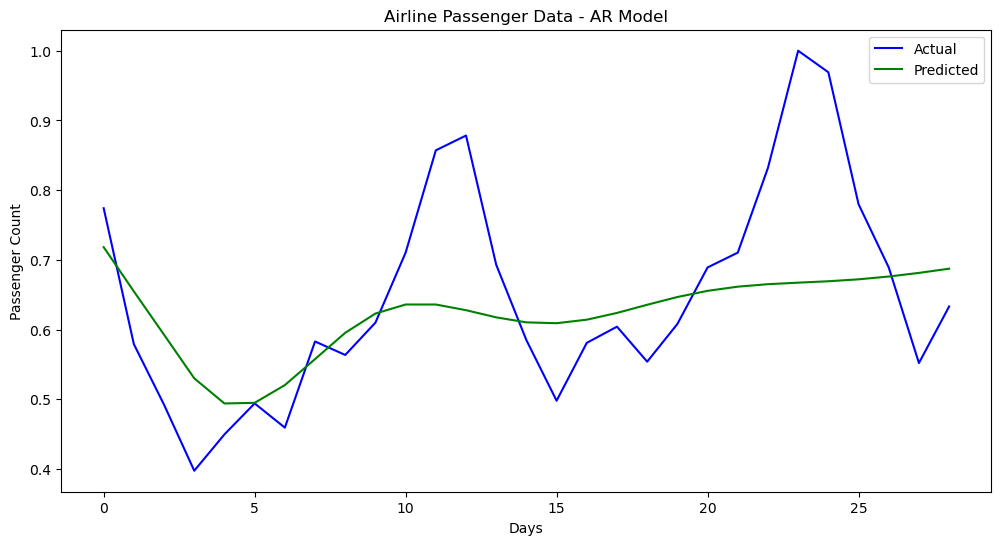

In [24]:
# Plot actual vs predicted
graph(y_test, y_pred, "Actual", "Predicted", "Airline Passenger Data - AR Model", "Days", "Passenger Count")

In [32]:
# Inverse transform predictions
aTestNormTable = pd.DataFrame(y_test, columns=['Passenger_Count'])
actual_passenger_count = scaler.inverse_transform(aTestNormTable)
actual_passenger_count_df = conversionSingle(actual_passenger_count, ['Passenger_Count'])
print("Actual Passenger Count:\n", actual_passenger_count_df)

Actual Passenger Count:
    Passenger_Count
0            505.0
1            404.0
2            359.0
3            310.0
4            337.0
5            360.0
6            342.0
7            406.0
8            396.0
9            420.0
10           472.0
11           548.0
12           559.0
13           463.0
14           407.0
15           362.0
16           405.0
17           417.0
18           391.0
19           419.0
20           461.0
21           472.0
22           535.0
23           622.0
24           606.0
25           508.0
26           461.0
27           390.0
28           432.0


In [33]:
pTestNormTable = pd.DataFrame(y_pred, columns=['Passenger_Count'])
predicted_passenger_count = scaler.inverse_transform(pTestNormTable)
predicted_passenger_count_df = conversionSingle(predicted_passenger_count, ['Passenger_Count'])
print("Predicted Passenger Count:\n", predicted_passenger_count_df)

Predicted Passenger Count:
    Passenger_Count
0       476.080454
1       443.197773
2       411.004989
3       378.637967
4       359.960711
5       360.419381
6       373.597631
7       392.923637
8        412.46428
9       426.760817
10        433.4752
11      433.467185
12      429.255635
13        423.9384
14      420.212741
15      419.581696
16      422.202847
17      427.219278
18       433.27274
19      439.038655
20      443.624275
21       446.72701
22      448.571056
23      449.703606
24      450.745704
25      452.184592
26      454.260886
27      456.959795
28      460.081795


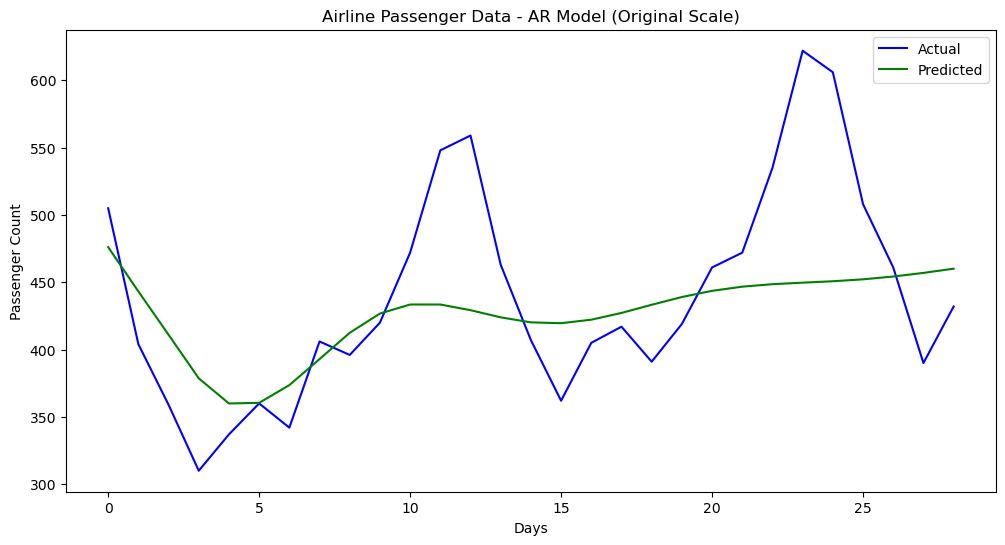

In [34]:
# Plot actual vs predicted with original scale
graph(actual_passenger_count_df, predicted_passenger_count_df, "Actual", "Predicted", "Airline Passenger Data - AR Model (Original Scale)", "Days", "Passenger Count")

In [35]:
# Evaluate performance
rmsemape(actual_passenger_count_df, predicted_passenger_count_df)

RMSE-Testset: 64.7211624715322
MAPE-Testset: 0.10140847785284347


In [36]:
# Forecast future values
forecast_steps = 12  # Forecasting for 1 year
forecast = model_fit.predict(start=len(data_scaled), end=len(data_scaled) + forecast_steps - 1)


In [37]:
# Save forecast to CSV
fTestNormTable = pd.DataFrame(forecast, columns=["Forecast"])
forecast_passenger_count = scaler.inverse_transform(fTestNormTable)
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_passenger_count_df.to_csv("AirlinePassengerForecast.csv", index=False)


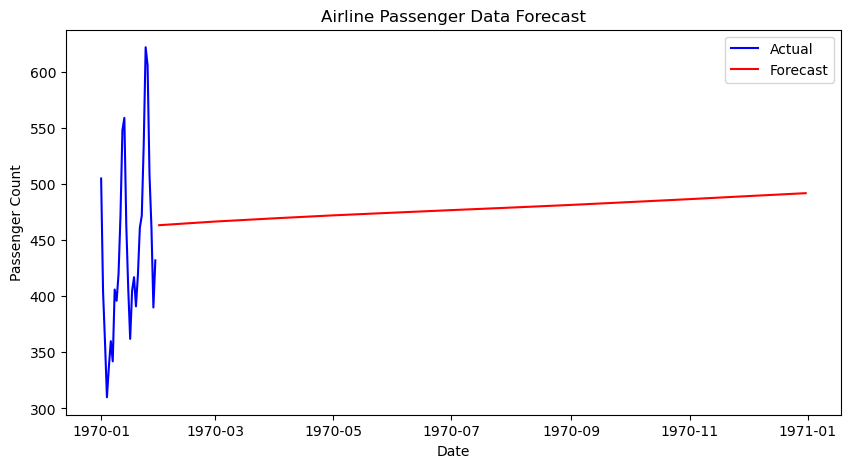

In [38]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(actual_passenger_count_df, color='blue', label="Actual")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M'), forecast_passenger_count_df, color='red', label="Forecast")
plt.title("Airline Passenger Data Forecast")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()